In [3]:
!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org dash dash-bootstrap-components plotly 

In [6]:
!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org jupyter_dash

In [1]:
import dash
from dash import dcc, html, Input, Output, Dash
import plotly.express as px
import pandas as pd


In [2]:
# Load Data
df = pd.read_csv("C:/Users/SOMYA/Downloads/twitter_dataset.csv")  # Change this to your actual file path
df.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21


In [3]:
import re
import pandas as pd

# Custom stopword list (since we can't use NLTK)
stop_words = set(["a", "an", "the", "is", "are", "was", "were", "this", "that", 
                  "to", "for", "in", "on", "and", "or", "of", "with", "at", 
                  "by", "from", "up", "down", "out", "about", "as", "if", 
                  "then", "so", "but", "be", "been", "being", "it", "its", 
                  "they", "them", "he", "she", "his", "her", "you", "your", "we", "us"])

def clean_text(text):
    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Remove hashtags (keep word, remove #)
    text = re.sub(r'#', '', text)
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    
    # Join words back into a single string
    cleaned_text = " ".join(words)
    
    return cleaned_text

In [4]:
df['Cleaned_Text'] = df['Text'].apply(clean_text)
df[['Text', 'Cleaned_Text']].sample(10)

,Text,Cleaned_Text
3088,Describe piece positive wonder start foot his ...,describe piece positive wonder start foot amou...
3952,Generation lead more career national hit dog. ...,generation lead more career national hit dog p...
3158,Member also TV gun model. Wall economy coach l...,member also tv gun model wall economy coach li...
1533,Affect while treat her alone say quite. Run pu...,affect while treat alone say quite run put tha...
591,Summer none meet physical tonight. Heavy techn...,summer none meet physical tonight heavy techno...
8806,Should special hard able decision. Also consid...,should special hard able decision also conside...
7538,Or area consider similar economy. Child accept...,area consider similar economy child accept age...
4442,Owner hard focus audience kid. Important scene...,owner hard focus audience kid important scene ...
7557,Letter any some knowledge wear here doctor. Mo...,letter any some knowledge wear here doctor mon...
6509,Company dark until usually anything understand...,company dark until usually anything understand...


In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
analyzer = SentimentIntensityAnalyzer()
def get_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)
    
    # Get compound score (final sentiment value)
    compound = sentiment_score['compound']
    
    # Assign sentiment labels
    if compound >= 0.05:
        return "Positive"
    elif compound <= -0.05:
        return "Negative"
    else:
        return "Neutral"
df['Sentiment'] = df['Cleaned_Text'].apply(get_sentiment)
df[['Cleaned_Text', 'Sentiment']].sample(10)

,Cleaned_Text,Sentiment
7566,assume game fear large pass budget tend societ...,Negative
3679,sort oil live nature second democrat woman sou...,Negative
5539,bank media small argue attack course full came...,Negative
136,prevent specific admit model series decide emp...,Negative
4633,where dinner among start next law partner eith...,Negative
1958,result size wall brother national head way att...,Positive
748,kitchen i such finally training blood blood fo...,Negative
3337,community bring meet sure until claim watch he...,Positive
3050,large garden establish ok job partner cell off...,Negative
1103,movement here sign wonder year inside same not...,Positive


In [6]:
df['Sentiment'].value_counts()

Sentiment
Positive    7927
Negative    1682
Neutral      391
Name: count, dtype: int64

In [8]:
@app.callback(
    Output('sentiment_bar_chart', 'figure'),
    Output('top_tweets', 'figure'),
    Input('sentiment_dropdown', 'value')
)
def update_dashboard(selected_sentiment):
    # Sentiment distribution bar chart
    sentiment_counts = df['Sentiment'].value_counts().reset_index()
    fig1 = px.bar(sentiment_counts, x='index', y='Sentiment', title="Sentiment Distribution")

    # Top liked and retweeted tweets per sentiment
    filtered_df = df[df['Sentiment'] == selected_sentiment]
    top_tweets = filtered_df.nlargest(5, 'Likes')
    fig2 = px.bar(top_tweets, x='Text', y='Likes', title=f"Top Liked {selected_sentiment} Tweets")

    return fig1, fig2


In [9]:
import dash
from dash import dcc, html, Input, Output, Dash
import plotly.express as px
import pandas as pd
from jupyter_dash import JupyterDash

# Sample dataset (replace with your real dataset)
df = pd.DataFrame({
    "Tweet_ID": range(1, 11),
    "Text": [
        "Amazing product!", "Worst service ever", "It's okay, not bad",
        "Great experience!", "Terrible response time", "Neutral feedback",
        "I love this!", "Disappointed with the quality", "Just another tweet",
        "Best purchase I made"
    ],
    "Sentiment": ["Positive", "Negative", "Neutral", "Positive", "Negative", "Neutral", 
                  "Positive", "Negative", "Neutral", "Positive"],
    "Likes": [120, 15, 34, 210, 5, 40, 180, 2, 50, 300],
    "Retweets": [30, 5, 8, 60, 1, 12, 50, 0, 18, 90]
})

# Initialize the app
app = Dash(__name__, external_stylesheets=['https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css'])

app.layout = html.Div([
    html.H1("Sentiment Analysis Dashboard", style={'textAlign': 'center'}),

    # Dropdown for selecting sentiment
    dcc.Dropdown(
        id='sentiment_dropdown',
        options=[
            {'label': 'Positive', 'value': 'Positive'},
            {'label': 'Negative', 'value': 'Negative'},
            {'label': 'Neutral', 'value': 'Neutral'}
        ],
        value='Positive',
        clearable=False
    ),

    # Sentiment Distribution Graph
    dcc.Graph(id='sentiment_bar_chart'),

    # Most Liked and Retweeted Tweets
    dcc.Graph(id='top_tweets')
])

# Callback to update sentiment bar chart
@app.callback(
    Output('sentiment_bar_chart', 'figure'),
    Input('sentiment_dropdown', 'value')
)
def update_sentiment_chart(selected_sentiment):
    filtered_df = df[df['Sentiment'] == selected_sentiment]
    fig = px.bar(filtered_df, x='Text', y='Likes', title=f"Likes per Tweet ({selected_sentiment} Sentiment)")
    return fig

# Callback to update most liked and retweeted tweets
@app.callback(
    Output('top_tweets', 'figure'),
    Input('sentiment_dropdown', 'value')
)
def update_top_tweets(selected_sentiment):
    filtered_df = df[df['Sentiment'] == selected_sentiment].nlargest(5, 'Likes')
    fig = px.scatter(filtered_df, x='Likes', y='Retweets', size='Likes', color='Sentiment', 
                     hover_data=['Text'], title=f"Top Tweets ({selected_sentiment} Sentiment)")
    return fig

# Run the app inside Jupyter Notebook
app.run(mode='inline')


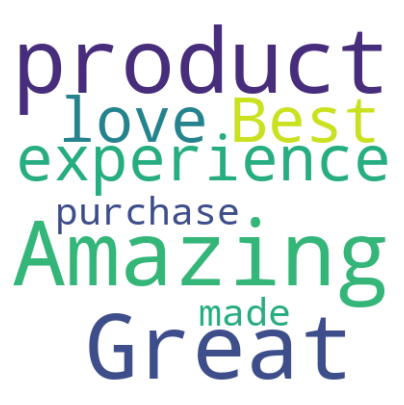

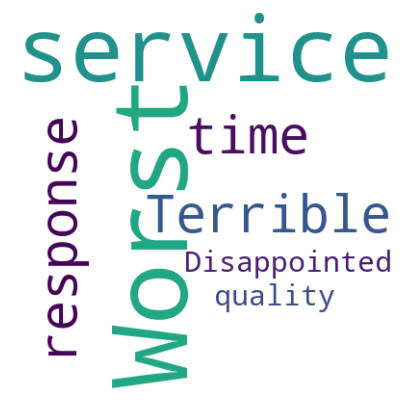

[2025-03-26 13:02:30,342] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\SOMYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\flask\app.py", line 1473, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\SOMYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\flask\app.py", line 882, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\SOMYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\flask\app.py", line 880, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\SOMYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\flask\app.py", line 865, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)  # type: ignore[no-any-return]
           ^^^^^^^^^^^^^^^^^^^^^^^

In [11]:
import dash
from dash import dcc, html, Input, Output, Dash
import plotly.express as px
import pandas as pd
import numpy as np
from jupyter_dash import JupyterDash
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
from io import BytesIO
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Sample dataset (replace with real Twitter dataset)
df = pd.DataFrame({
    "Tweet_ID": range(1, 11),
    "Text": [
        "Amazing product!", "Worst service ever", "It's okay, not bad",
        "Great experience!", "Terrible response time", "Neutral feedback",
        "I love this!", "Disappointed with the quality", "Just another tweet",
        "Best purchase I made"
    ],
    "Sentiment": ["Positive", "Negative", "Neutral", "Positive", "Negative", "Neutral", 
                  "Positive", "Negative", "Neutral", "Positive"],
    "Likes": [120, 15, 34, 210, 5, 40, 180, 2, 50, 300],
    "Retweets": [30, 5, 8, 60, 1, 12, 50, 0, 18, 90]
})

# Initialize the app
app = Dash(__name__, external_stylesheets=['https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css'])

app.layout = html.Div([
    html.H1("Sentiment Analysis Dashboard", style={'textAlign': 'center'}),

    # Dropdown for selecting sentiment
    dcc.Dropdown(
        id='sentiment_dropdown',
        options=[
            {'label': 'Positive', 'value': 'Positive'},
            {'label': 'Negative', 'value': 'Negative'},
            {'label': 'Neutral', 'value': 'Neutral'}
        ],
        value='Positive',
        clearable=False
    ),

    # Row 1: Sentiment Bar Chart & WordCloud
    html.Div([
        dcc.Graph(id='sentiment_bar_chart', style={'width': '48%', 'display': 'inline-block'}),
        html.Img(id='wordcloud', style={'width': '48%', 'display': 'inline-block'})
    ]),

    # Row 2: Top Tweets Scatter Plot & Topic Modeling
    html.Div([
        dcc.Graph(id='top_tweets', style={'width': '48%', 'display': 'inline-block'}),
        dcc.Graph(id='topic_modeling', style={'width': '48%', 'display': 'inline-block'})
    ])
])

# Callback to update sentiment bar chart
@app.callback(
    Output('sentiment_bar_chart', 'figure'),
    Input('sentiment_dropdown', 'value')
)
def update_sentiment_chart(selected_sentiment):
    filtered_df = df[df['Sentiment'] == selected_sentiment]
    fig = px.bar(filtered_df, x='Text', y='Likes', title=f"Likes per Tweet ({selected_sentiment} Sentiment)")
    return fig

# Callback to update most liked/retweeted tweets scatter plot
@app.callback(
    Output('top_tweets', 'figure'),
    Input('sentiment_dropdown', 'value')
)
def update_top_tweets(selected_sentiment):
    filtered_df = df[df['Sentiment'] == selected_sentiment].nlargest(5, 'Likes')
    fig = px.scatter(filtered_df, x='Likes', y='Retweets', size='Likes', color='Sentiment', 
                     hover_data=['Text'], title=f"Top Tweets ({selected_sentiment} Sentiment)")
    return fig

# Callback to generate WordCloud
@app.callback(
    Output('wordcloud', 'src'),
    Input('sentiment_dropdown', 'value')
)
def generate_wordcloud(selected_sentiment):
    sentiment_text = " ".join(df[df["Sentiment"] == selected_sentiment]["Text"])

    # Generate WordCloud
    wordcloud = WordCloud(width=400, height=400, background_color="white").generate(sentiment_text)
    img = BytesIO()
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig(img, format='png', bbox_inches='tight')
    img.seek(0)
    encoded_image = base64.b64encode(img.getvalue()).decode('utf-8')
    return f"data:image/png;base64,{encoded_image}"

# Callback to generate Trending Topics (Topic Modeling)
@app.callback(
    Output('topic_modeling', 'figure'),
    Input('sentiment_dropdown', 'value')
)
def generate_topic_model(selected_sentiment):
    filtered_text = df[df["Sentiment"] == selected_sentiment]["Text"]

    if len(filtered_text) < 2:
        return px.bar(title="Not enough data for topic modeling")

    vectorizer = CountVectorizer(stop_words='english', max_features=500)
    text_matrix = vectorizer.fit_transform(filtered_text)
    lda = LatentDirichletAllocation(n_components=1, random_state=42)
    lda.fit(text_matrix)
    
    topic_words = np.array(vectorizer.get_feature_names_out())[np.argsort(-lda.components_, axis=1)[:, :5][0]]
    
    fig = px.bar(x=topic_words, y=[1]*len(topic_words), title=f"Trending Topics ({selected_sentiment} Sentiment)")
    return fig

# Run the app inside Jupyter Notebook
app.run(mode='inline')
